In [ ]:
##### import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px # to plot the time series plot
# from sklearn import metrics # for the evaluation
# from sklearn.preprocessing import LabelEncoder,MinMaxScaler
# import tensorflow as tf 

import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# import tensorflow as tf

import tqdm as tq
import string
import statistics as stats
import re

from numpy import arange, mean, var, std, array, append, diff, cumsum


import sqlite3

In [ ]:
# To make df_streets and clean the data.

# Change directory
directory = "C:/Users/20203384/Documents/Year2/Q3/Data Challenge 2/Jan_2010_Oct_2021/Jan_2010_Oct_2021"
df_street = pd.DataFrame()

folders = [folder for folder in tq.tqdm(os.listdir(directory)) if not str(folder).strip("'b").startswith('.')]

for folder in folders:
    files_street = []

    # Here you can change the date range
    if int(folder[:4]) > 2014:
        # generate the path to folder
        folder_direc = os.fsencode(directory + '/'+ str(folder))
        print(folder)
        
        # add each file name to the appropriate list
        for file in os.listdir(folder_direc):
            file = str(file).strip("'b")
            if (bool(re.search('street', file))):
                files_street.append(file)
                
        # Clean dataframe
        for file in tq.tqdm(files_street):
            # Create dataframe from the current file
            current_data_street = pd.read_csv(directory + '/' + str(folder).strip("'b") + '/' + str(file)) 
            # Drop the attributes considered irrelevant
            current_data_street.drop(['Reported by', 'Longitude', 'Latitude', \
                                                            'Location', 'Context'], axis=1, inplace=True)
            current_data_street.dropna(subset=['LSOA code'], inplace=True)
            current_data_street.dropna(subset=['Crime type'], inplace=True)
            df_street = df_street.append(current_data_street)


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/20203384/Documents/Year2/Q3/Data Challenge 2/Jan_2010_Oct_2021/Jan_2010_Oct_2021'

In [ ]:
df_street

,Crime ID,Month,Falls within,LSOA code,LSOA name,Crime type,Last outcome category
0,NaN,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN
1,NaN,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN
2,34dea09de393fe0dcb88277578833a69996e5f320bb454...,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Burglary,Investigation complete; no suspect identified
3,1575f14e1f1f43aec32c619052b7e705469cfea51b0d82...,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Investigation complete; no suspect identified
4,37804e288ca6bdb52c6e73ea52847f3808b8a5e6cb9f6e...,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Other theft,Investigation complete; no suspect identified
...,...,...,...,...,...,...,...
4632,49092dec9f064d1f55e4c1274f8cdc1d6050766a0e95a4...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Criminal damage and arson,Under investigation
4633,baef9c23158d3a83a8c34fb25d27cfb78df23ab526c474...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Public order,Under investigation
4634,735b07a0bb5229f360aa31bb0e6ce458635bc550c3b1e5...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Vehicle crime,Under investigation
4635,368a849dc629c19ba90a46068503a6e4a922ae1e8bfc16...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Violence and sexual offences,Under investigation


In [ ]:
df_street['Datetime'] = pd.to_datetime(df_street['Month'], format='%Y.%m')
df_street['Month_int'] = pd.DatetimeIndex(df_street['Datetime']).month
df_street['Year_int'] = pd.DatetimeIndex(df_street['Datetime']).year


In [ ]:
df_street

,Crime ID,Month,Falls within,LSOA code,LSOA name,Crime type,Last outcome category,Datetime,Month_int,Year_int,YM
0,NaN,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,2015-01-01,1,2015,1
1,NaN,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Anti-social behaviour,NaN,2015-01-01,1,2015,1
2,34dea09de393fe0dcb88277578833a69996e5f320bb454...,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Burglary,Investigation complete; no suspect identified,2015-01-01,1,2015,1
3,1575f14e1f1f43aec32c619052b7e705469cfea51b0d82...,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Criminal damage and arson,Investigation complete; no suspect identified,2015-01-01,1,2015,1
4,37804e288ca6bdb52c6e73ea52847f3808b8a5e6cb9f6e...,2015-01,Avon and Somerset Constabulary,E01014399,Bath and North East Somerset 001A,Other theft,Investigation complete; no suspect identified,2015-01-01,1,2015,1
...,...,...,...,...,...,...,...,...,...,...,...
4632,49092dec9f064d1f55e4c1274f8cdc1d6050766a0e95a4...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Criminal damage and arson,Under investigation,2021-10-01,10,2021,82
4633,baef9c23158d3a83a8c34fb25d27cfb78df23ab526c474...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Public order,Under investigation,2021-10-01,10,2021,82
4634,735b07a0bb5229f360aa31bb0e6ce458635bc550c3b1e5...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Vehicle crime,Under investigation,2021-10-01,10,2021,82
4635,368a849dc629c19ba90a46068503a6e4a922ae1e8bfc16...,2021-10,Wiltshire Police,E01031995,Wiltshire 062E,Violence and sexual offences,Under investigation,2021-10-01,10,2021,82


In [ ]:
df_top = df_street.groupby(['Falls within']).count().sort_values(by=['Month'], ascending=False).head(4)

In [ ]:
df_top

In [ ]:
df_table = df_top.rename(columns={'Month': 'Number of crimes'})
df_table = df_table[['Number of crimes']]
df_table

,Number of crimes
Falls within,
Metropolitan Police Service,7150921
West Yorkshire Police,2086347
West Midlands Police,1792047
Greater Manchester Police,1704643


In [ ]:
df_top_d = df_street[(df_street['Falls within'] == 'Metropolitan Police Service') | 
          (df_street['Falls within'] == 'West Yorkshire Police') |
         (df_street['Falls within'] == 'West Midlands Police') |
         (df_street['Falls within'] == 'Greater Manchester Police')]

In [ ]:
df_top_dist = df_top_dist.groupby(['Month', 'Falls within']).count()

In [ ]:
df_top_dist

Crime ID  LSOA code  LSOA name  \
Month   Falls within                                                  
2015-01 Greater Manchester Police       16269      25221      25221   
        Metropolitan Police Service     57537      72072      72072   
        West Midlands Police            14657      19095      19095   
        West Yorkshire Police           13020      18478      18478   
2015-02 Greater Manchester Police       16672      25403      25403   
...                                       ...        ...        ...   
2021-08 West Yorkshire Police           23866      27466      27466   
2021-09 Metropolitan Police Service     67014      88916      88916   
        West Yorkshire Police           24403      27309      27309   
2021-10 Metropolitan Police Service     70876      91874      91874   
        West Yorkshire Police           25746      28761      28761   

                                     Crime type  Last outcome category  \
Month   Falls within                                                     
2015-01 Greater Manchester Police         25221                  16269   
        Metropolitan Police Service       72072                  57537   
        West Midlands Police              19095                  14657   
        West Yorkshire Police             18478                  13020   
2015-02 Greater Manchester Police         25403                  16672   
...                                         ...                    ...   
2021-08 West Yorkshire Police             27466                  23866   
2021-09 Metropolitan Police Service       88916                  67014   
        West Yorkshire Police             27309                  24403   
2021-10 Metropolitan Police Service       91874                  70876   
        West Yorkshire Police             28761                  25746   

                                     Datetime  Month_int  Year_int     YM  
Month   Falls within                                                       
2015-01 Greater Manchester Police       25221      25221     25221  25221  
        Metropolitan Police Service     72072      72072     72072  72072  
        West Midlands Police            19095      19095     19095  19095  
        West Yorkshire Police           18478      18478     18478  18478  
2015-02 Greater Manchester Police       25403      25403     25403  25403  
...                                       ...        ...       ...    ...  
2021-08 West Yorkshire Police           27466      27466     27466  27466  
2021-09 Metropolitan Police Service     88916      88916     88916  88916  
        West Yorkshire Police           27309      27309     27309  27309  
2021-10 Metropolitan Police Service     91874      91874     91874  91874  
        West Yorkshire Police           28761      28761     28761  28761  

[293 rows x 9 columns]

In [ ]:
df_test = df_top_dist[['LSOA code']].unstack()

In [ ]:
df_top_dist

Crime ID  LSOA code  LSOA name  \
Month   Falls within                                                  
2015-01 Greater Manchester Police       16269      25221      25221   
        Metropolitan Police Service     57537      72072      72072   
        West Midlands Police            14657      19095      19095   
        West Yorkshire Police           13020      18478      18478   
2015-02 Greater Manchester Police       16672      25403      25403   
...                                       ...        ...        ...   
2021-08 West Yorkshire Police           23866      27466      27466   
2021-09 Metropolitan Police Service     67014      88916      88916   
        West Yorkshire Police           24403      27309      27309   
2021-10 Metropolitan Police Service     70876      91874      91874   
        West Yorkshire Police           25746      28761      28761   

                                     Crime type  Last outcome category  \
Month   Falls within                                                     
2015-01 Greater Manchester Police         25221                  16269   
        Metropolitan Police Service       72072                  57537   
        West Midlands Police              19095                  14657   
        West Yorkshire Police             18478                  13020   
2015-02 Greater Manchester Police         25403                  16672   
...                                         ...                    ...   
2021-08 West Yorkshire Police             27466                  23866   
2021-09 Metropolitan Police Service       88916                  67014   
        West Yorkshire Police             27309                  24403   
2021-10 Metropolitan Police Service       91874                  70876   
        West Yorkshire Police             28761                  25746   

                                     Datetime  Month_int  Year_int     YM  
Month   Falls within                                                       
2015-01 Greater Manchester Police       25221      25221     25221  25221  
        Metropolitan Police Service     72072      72072     72072  72072  
        West Midlands Police            19095      19095     19095  19095  
        West Yorkshire Police           18478      18478     18478  18478  
2015-02 Greater Manchester Police       25403      25403     25403  25403  
...                                       ...        ...       ...    ...  
2021-08 West Yorkshire Police           27466      27466     27466  27466  
2021-09 Metropolitan Police Service     88916      88916     88916  88916  
        West Yorkshire Police           27309      27309     27309  27309  
2021-10 Metropolitan Police Service     91874      91874     91874  91874  
        West Yorkshire Police           28761      28761     28761  28761  

[293 rows x 9 columns]

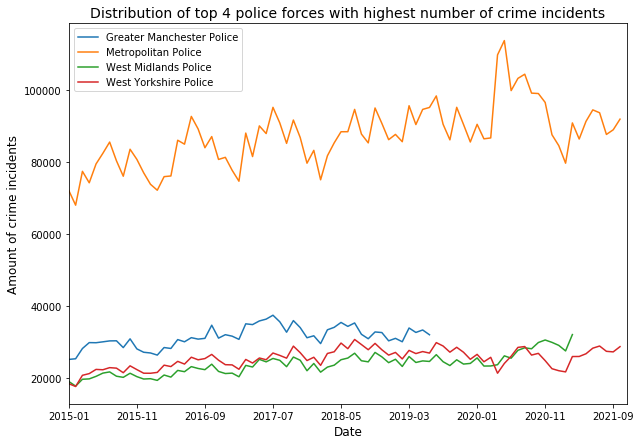

In [ ]:
ax = df_test.plot(figsize=(10,7))
ax.legend(['Greater Manchester Police', 'Metropolitan Police', 'West Midlands Police', 'West Yorkshire Police'])
ax.set_xlabel('Date', size=12)
ax.set_ylabel('Amount of crime incidents', size=12)
ax.set_xlim(0, 82)
ax.set_title('Distribution of top 4 police forces with highest number of crime incidents', size = 14);

In [ ]:
df_top_d2 = df_top_d[(df_top_d['Crime type'] == 'Violence and sexual offences') |
                    (df_top_d['Crime type'] == 'Anti-social behaviour') |
                    (df_top_d['Crime type'] == 'Vehicle crime') |
                    (df_top_d['Crime type'] == 'Other theft')]

In [ ]:
df_top_type = df_top_d2.groupby(['Falls within', 'Crime type']).count().sort_values(by='Month', ascending=False)[['Month']]

In [ ]:
df_crime_type = df_top_d.groupby(['Crime type']).count().sort_values(by='Month', ascending=False)

In [ ]:
df_crime_type #top 5 crimes = violence & sexual offences, anti social behavior, vehicle crime, burglary 

,Crime ID,Month,Falls within,LSOA code,LSOA name,Last outcome category,Datetime,Month_int,Year_int,YM
Crime type,,,,,,,,,,
Violence and sexual offences,2988355,2988355,2988355,2988355,2988355,2988355,2988355,2988355,2988355,2988355
Anti-social behaviour,0,2963537,2963537,2963537,2963537,0,2963537,2963537,2963537,2963537
Vehicle crime,1150497,1150497,1150497,1150497,1150497,1150497,1150497,1150497,1150497,1150497
Other theft,1109552,1109552,1109552,1109552,1109552,1109552,1109552,1109552,1109552,1109552
Burglary,913553,913553,913553,913553,913553,913553,913553,913553,913553,913553
Criminal damage and arson,902996,902996,902996,902996,902996,902996,902996,902996,902996,902996
Public order,732017,732017,732017,732017,732017,732017,732017,732017,732017,732017
Shoplifting,578349,578349,578349,578349,578349,578349,578349,578349,578349,578349
Drugs,359516,359516,359516,359516,359516,359516,359516,359516,359516,359516


In [ ]:
df_top_type = df_top_type.unstack() #['Month'].plot(kind='hist')

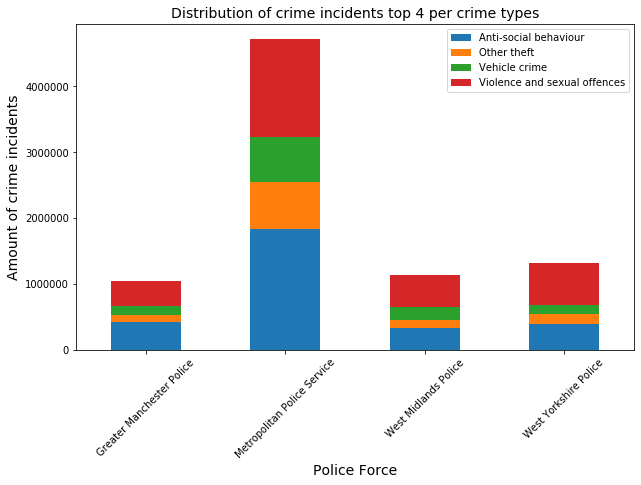

In [ ]:
ax = df_top_type.plot.bar(stacked=True, figsize=(10,6))
ax.legend(['Anti-social behaviour', 'Other theft', 'Vehicle crime', 'Violence and sexual offences'])
ax.set_xlabel('Police Force', size=14)
ax.set_ylabel('Amount of crime incidents', size=14)
ax.set_title('Distribution of crime incidents top 4 per crime types', size=14);
ax.xaxis.set_tick_params(rotation=45)


## Most populated cities

In [ ]:
df_london = df_street[df_street['Falls within'] == 'City of London Police']
ldn = len(df_london)

In [ ]:
# convert number of crimes to average per year
num_crimes =[7150921 + ldn, 1704643, 1792047, 2086347] 
num = []
for number in num_crimes:
    num.append(int(number / 82 * 12))
    
num

[1053277, 249459, 262250, 305319]

In [ ]:
d = {'City': ['(Greater) London', 'Manchester', 'Birmingham', 'Leeds'], 'Population': [9304016, 2730076, 2607437, 1889095], 'Number of crimes': num}
df = pd.DataFrame(data=d)


In [ ]:
df['Crimes per head per year'] = df['Number of crimes'] / df['Population']

In [ ]:
df

,City,Population,Number of crimes,Crimes per head per year
0,(Greater) London,9304016,1053277,0.113207
1,Manchester,2730076,249459,0.091374
2,Birmingham,2607437,262250,0.100578
3,Leeds,1889095,305319,0.161622


In [ ]:
df.set_index('City')

,Population,Number of crimes,Crimes per head per year
City,,,
(Greater) London,9304016,1053277,0.113207
Manchester,2730076,249459,0.091374
Birmingham,2607437,262250,0.100578
Leeds,1889095,305319,0.161622


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=40789b9a-1c62-45b9-9d9c-b1a39ebe3dfd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>